Вы работаете в интернет-магазине, который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Описание данных**
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
- *Данные за 2016 год могут быть неполными.

## Изучим информацию о данных

In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats as st
import matplotlib.pyplot as plt
import numpy as np
import random
from scipy.stats import binom, norm

In [2]:
df = pd.read_csv('/datasets/games.csv')
df.info()
display(df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
display(df.describe())

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Пропусков много, медианы со средним почти везде сильно разнятся. Могут быть явные и неявные дубли, надо привести все к одному регистру написания и поправить тип данных.

Теперь проведем анализ пропусков

In [4]:
!pip install missingno

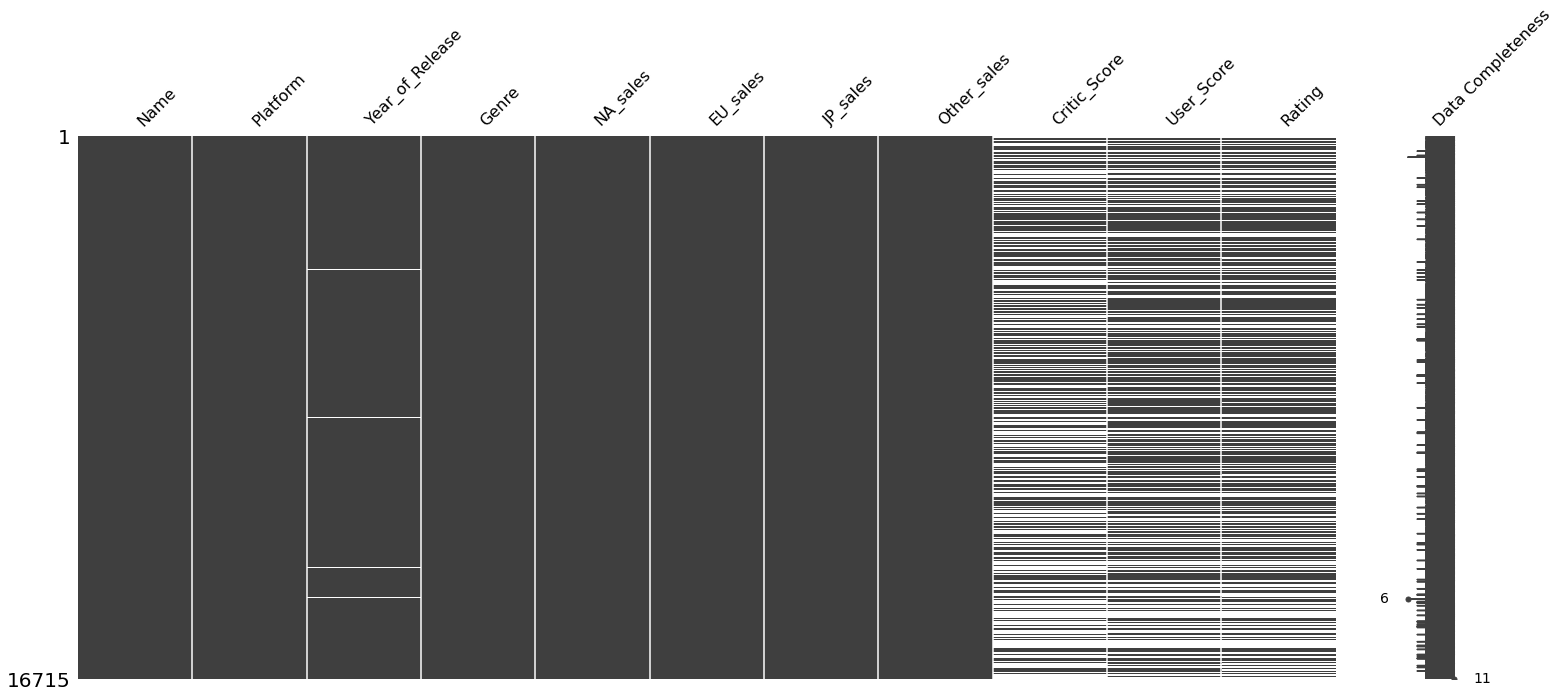

In [5]:
import missingno as msno
pd.options.display.max_columns
msno.matrix(df, labels=True)
plt.show()

Большая проблема в Critic_Score, User_Score и Rating. В Year_of_Release можно заполнить медианой спокойно.

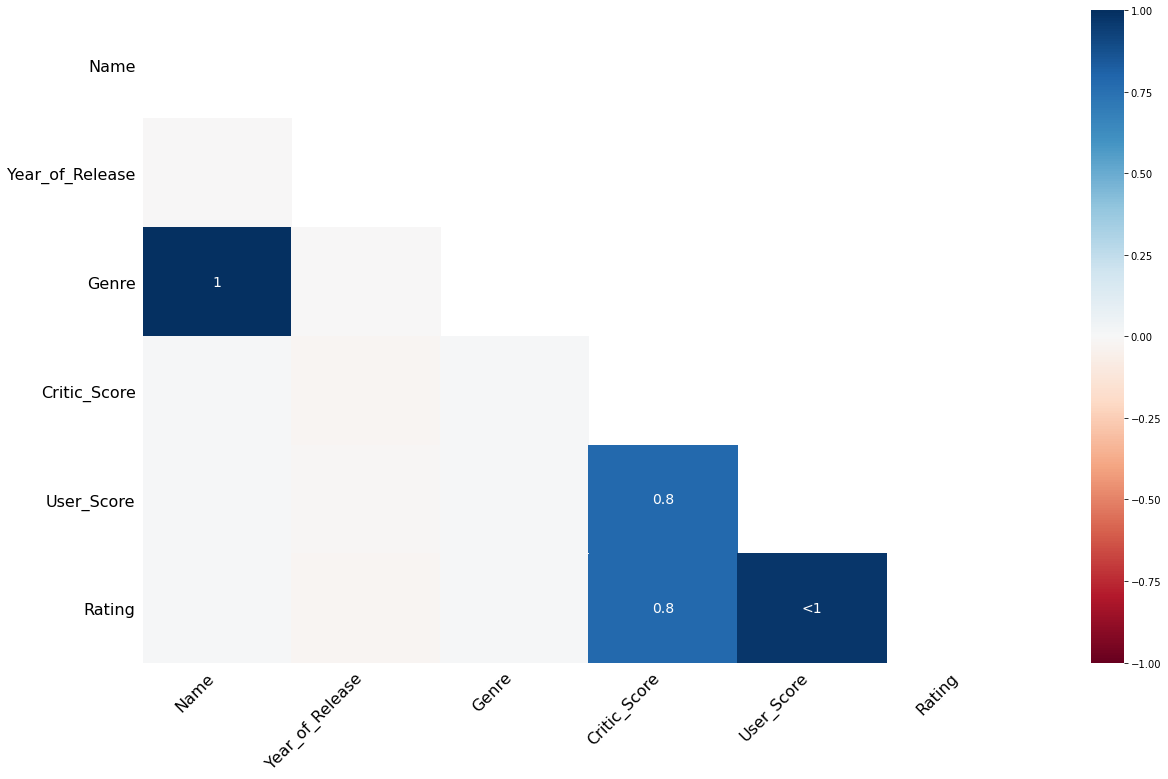

In [6]:
msno.heatmap(df)
plt.show()

На хитмэпе четко видим, что отсутствует Genre там же где Name. Critic_Score пропуски тесно связаны с пропусками Rating и User_Score. nan в User_Score почти совпадают с Rating.

**Определяем проблемы данных для раздела предобработки:**
- Пропусков много.
- Есть некорректный тип данных (Year_of_Release) - должен быть int, User_score - должен быть float.
- Лучше приведем названия столбцов и написание строк к маленькому регистру.
- По медиане и среднему отклонения довольно большие почти во всех столбцах, нужно разобраться с пропусками, где сможем и проверить на наличие дубликатов.

## Предобработка данных

Сразу удалим 2 строки с пропуссками в genre и name. Скорее всего это ошибка выгрузки данных

In [7]:
df = df.dropna(subset=['Genre'])
df['Genre'].isnull().sum()

0

Исправим регистр строк таблицы

In [8]:
df.columns = df.columns.str.lower()
df.columns
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,e
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,e
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,e
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,gb,1989.0,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,new super mario bros.,ds,2006.0,platform,11.28,9.14,6.50,2.88,89.0,8.5,e
7,wii play,wii,2006.0,misc,13.96,9.18,2.93,2.84,58.0,6.6,e
8,new super mario bros. wii,wii,2009.0,platform,14.44,6.94,4.70,2.24,87.0,8.4,e
9,duck hunt,nes,1984.0,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


year_of_release приведем к int, а user_score к float

In [9]:
df['year_of_release'] = df['year_of_release'].fillna(df['year_of_release'].median())
df['year_of_release'] = df['year_of_release'].astype(int)
df['user_score'].value_counts()
#значения tbd означают, что оценка еще "не определена" на дату составления таблицы. 
#Их не так много, принято решение заменить на медиану 
df['user_score'] = df['user_score'].replace('tbd',np.NaN)
df['user_score'] = df['user_score'].astype(float)

Теперь поработаем с пропусками. Их много, я заменю значения на -1, чтобы не терять реальные оценки "0"

In [10]:
df['user_score'] = df['user_score'].fillna(-1)
df['critic_score'] = df['critic_score'].fillna(-1)
df['rating'] = df['rating'].fillna(-1)

Снова вызову карту пропусков и посмотрим, что изменилось

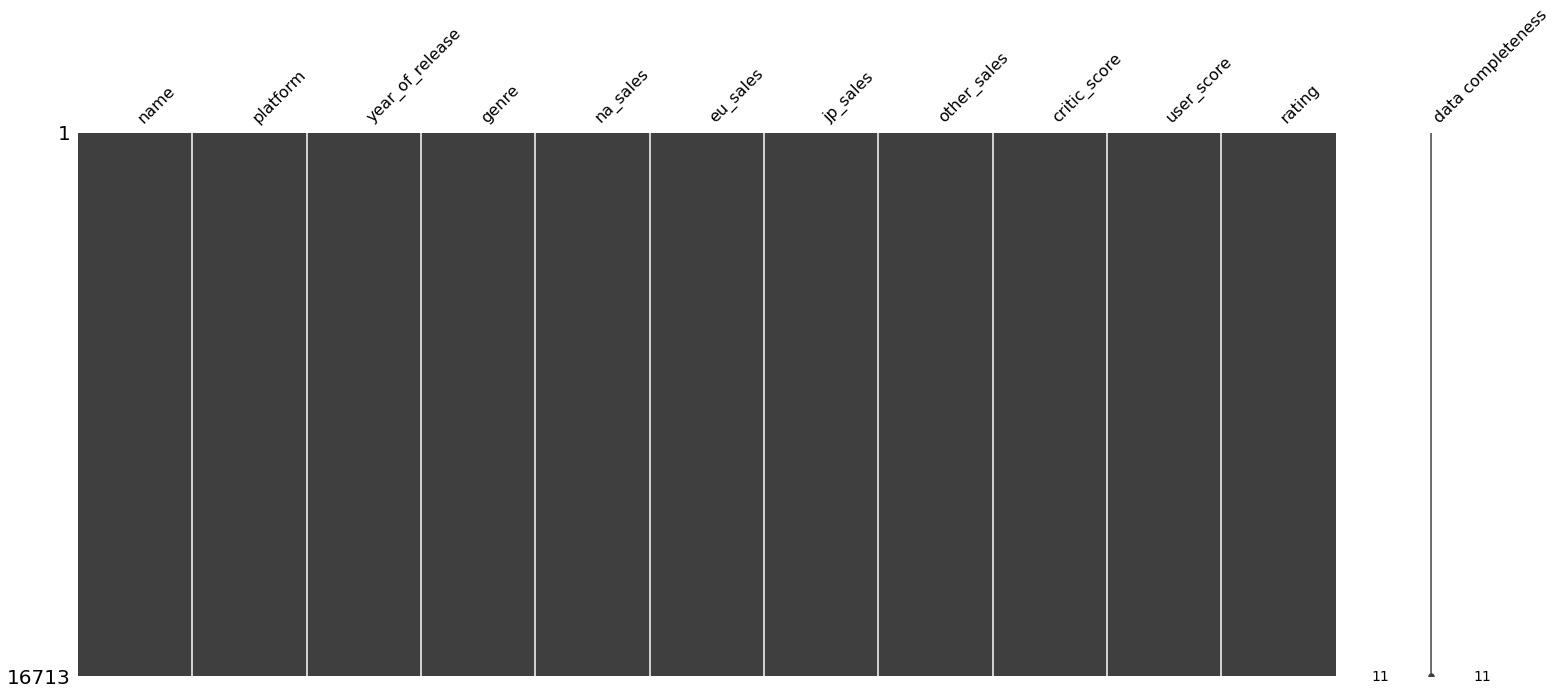

In [11]:
pd.options.display.max_columns
msno.matrix(df, labels=True)
plt.show()

Касательно пропусков в колонках с оценками и рейтингом у меня следующее предположение: либо причина в ошибке выгрузки данных, либо ошибка при первоначальном сборе информации. Нужно сообщить специалистам!

Теперь сделаем новый столбец суммарных продаж во всех регионах.

In [12]:
df['sales_total'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

Теперь проверим на дубликаты

In [13]:
df.duplicated().sum()

0

In [14]:
#Нашел ошибку года выпуска приставки DS, заменил на 2004 в соответствии с реальностью
df['year_of_release'] = pd.to_numeric(df['year_of_release'], errors='coerce')
df.loc[(df['platform'] == 'ds') & (df['year_of_release'] == 1985), 'year_of_release'] = 2004
check = df.loc[df['platform'] == 'ds', ['year_of_release']]
print(check.value_counts())

year_of_release
2008               492
2007               406
2009               403
2010               323
2006               201
2011               153
2005               118
2004                24
2012                23
2013                 8
dtype: int64


**Готово. Итог по разделу:**
- Данные от пропусков очистили.
- Типы данных привели к правильному.
- Привели все надписи к маленькому регистру и проверили таблицу на дубликаты.

Теперь данные готовы к дальнейшему анализу!

## Исследовательский анализ данных

### Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

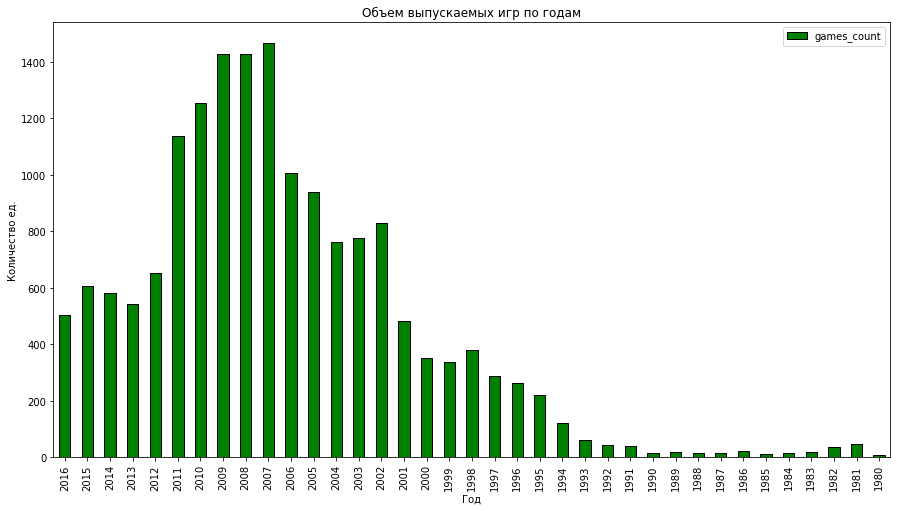

In [15]:
df_years = df.sort_values(by = 'year_of_release')
df_years_pivot = df_years.pivot_table(index = 'year_of_release', values = ['name'], aggfunc=('count'))
df_years_pivot.columns = ['games_count']
df_years_pivot = df_years_pivot.sort_values(by='year_of_release', ascending=False)
df_years_pivot.plot(kind='bar', color='green', ec='black', figsize=(15,8))
plt.title('Объем выпускаемых игр по годам')
plt.xlabel('Год')
plt.ylabel('Количество ед.')
plt.show()

Выпуск игр был на пике в 2007г., после чего количество выпускаемых игр в год пошло на спад. Я бы сказал, что до 1994 данные не существенны, поскольку тогда и компьютеры были и слабые и игр почти не выходило.

### Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

,platform,sales_total
16,ps2,1255.77
28,x360,971.42
17,ps3,939.65
25,wii,907.51
4,ds,806.12
15,ps,730.86
6,gba,317.85
18,ps4,314.14
19,psp,294.05
13,pc,259.52


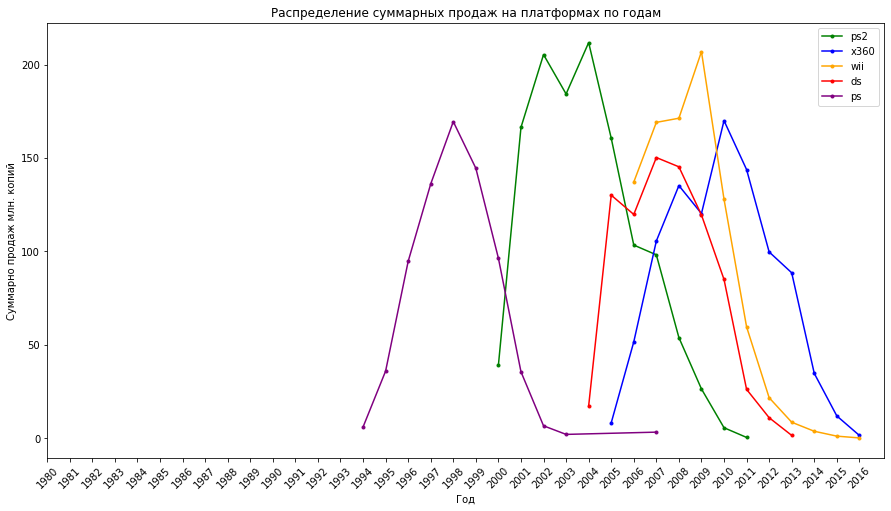

In [16]:
game_platform_data = df.loc[:, ['platform', 'year_of_release', 'sales_total']]
total_platform_data = game_platform_data.copy()
#сделал 2 таблицы, в одной определил лидеров по продажам, 
#во второй сделал уже нужную группировку распределние по годам на графике

game_platform_data = game_platform_data.groupby(
    ['platform'], as_index=False
).agg({'sales_total':'sum'}).sort_values(by='sales_total', ascending=False)
display(game_platform_data.head(10))
# Возьмем для анализа первые 5 платформ: ps2, x360, ps3, wii, ds, ps

total_platform_data = total_platform_data.query(
    'platform in ["ps2", "x360", "ps3", "wii", "ds", "ps"]'
    ).groupby(['platform','year_of_release'], as_index=False
    ).agg({'sales_total':'sum'}).sort_values(by='year_of_release', ascending=False)

def platform_plot(a,b,ax,label):
    rofl = total_platform_data[total_platform_data['platform'] == a]
    return rofl.plot(x='year_of_release', y='sales_total', style='.-', kind='line', color=b, ax=ax, label=label)

fig, ax = plt.subplots(figsize=(15,8))
platform_plot('ps2', 'green', ax, 'ps2')
platform_plot('x360', 'blue', ax, 'x360')
platform_plot('wii', 'orange', ax, 'wii')
platform_plot('ds', 'red', ax, 'ds')
platform_plot('ps', 'purple', ax, 'ps')


plt.title('Распределение суммарных продаж на платформах по годам')
plt.xlabel('Год')
plt.ylabel('Суммарно продаж млн. копий')
years = sorted(df['year_of_release'].unique())
plt.xticks(years, rotation=45)


plt.show()

Анализируя начало роста и спад продаж, можно заметить, что платформы существуют примерно по 10 лет. Затем выходит новая платформа, а популярность предыдущей уходит на нет. P.S. иногда, конечно, вспоминают и старенькие, например платформу DS.

### Возьмем данные за соответствующий актуальный период. Актуальный период определим самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

Я считаю, что нужно взять данные с 2013 года по 2016, поскольку именно в 2013 году вышли 2 новые платформы и мы сможем отследить актуальные тренды, а старые на анализ не повлияют.

In [17]:
actual_period_df = df.copy()
actual_period_df = actual_period_df.query('year_of_release >= 2013')
actual_period_df['year_of_release'].value_counts()

2015    606
2014    581
2013    544
2016    502
Name: year_of_release, dtype: int64

Данный период достаточно большой для анализа цикла популярности платформы. На мой взгляд, этого достаточно для прогнозирования тенденций на 2017 год

### Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.

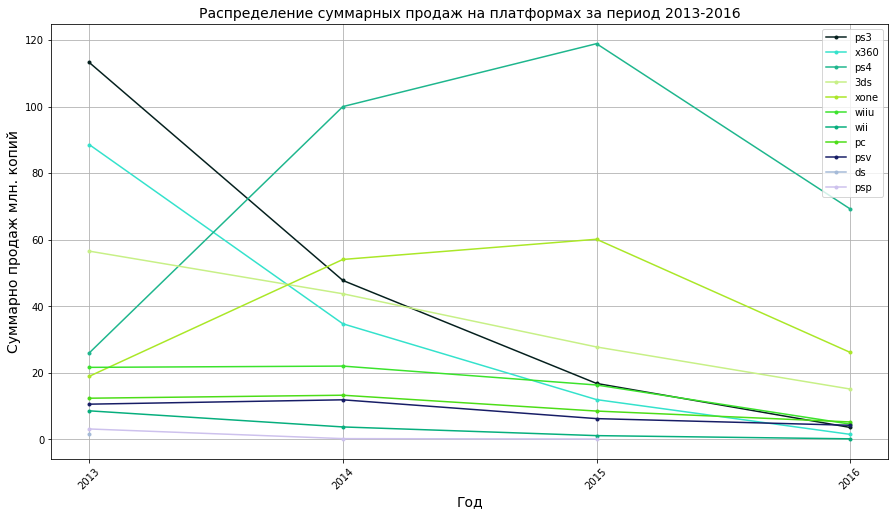

In [18]:
sales_leads = actual_period_df.loc[:,['platform','year_of_release','sales_total']].copy() 
sales_leads = sales_leads.groupby(
    ['platform','year_of_release'], as_index=False
    ).agg({'sales_total':'sum'})

#Написали функцию для графиков
def leads_plot(a,b,ax,label):
    query = sales_leads[sales_leads['platform'] == a]
    return query.plot(x='year_of_release', y='sales_total', kind='line', style='.-', color=b, ax=ax, label=label)

fig, ax = plt.subplots(figsize=(15,8))


amani = list(actual_period_df['platform'].unique())
for i in amani:
    random_color = (random.random(), random.random(), random.random())
    leads_plot(i, random_color, ax, i)

    
plt.title('Распределение суммарных продаж на платформах за период 2013-2016', fontsize=14)
plt.xlabel('Год', fontsize=14)
plt.ylabel('Суммарно продаж млн. копий', fontsize=14)
new_years = sales_leads['year_of_release'].unique()
plt.xticks(new_years, rotation=45)
plt.grid(True)
plt.show()

**На графике видно, что топ 3 платформы на 2015-2016г.:**
- PS4
- X one
- 3DS

Мы видим, что в последние годы, весь рынок игр терпит определенный кризис продаж. Далее рассмотрим графики топов детальнее:

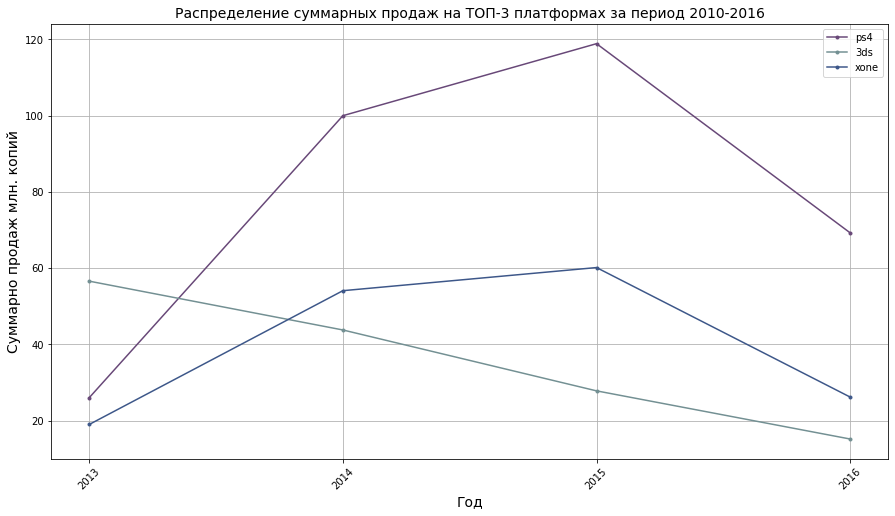

In [19]:
happy_new_years = [2013,2014,2015,2016]
fig, ax = plt.subplots(figsize=(15,8))

amani_r = ['ps4','3ds', 'xone']
for i in amani_r:
    random_color = (random.random(), random.random(), random.random())
    leads_plot(i, random_color, ax, i)

plt.title('Распределение суммарных продаж на ТОП-3 платформах за период 2010-2016', fontsize=14)
plt.xlabel('Год', fontsize=14)
plt.ylabel('Суммарно продаж млн. копий', fontsize=14)
plt.xticks(happy_new_years, rotation=45)
plt.grid(True)
plt.show()

В условиях кризиса сложно выбрать потенциально прибыльные платформы. Поскольку PS3 и x360 уже устаревшие модели, прожившие многие годы, можно сказать, что **PS4** и **X one** вновь проявят себя лучше других платформ с точки зрения популярности/мощности/выпуску и продажам новых игр, пока их не заменят более новые модели. Так или иначе, Microsoft и Sony до сих пор киты в области игровых консолей, у которых нет больше подобных по масштабу конкурентов.

### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

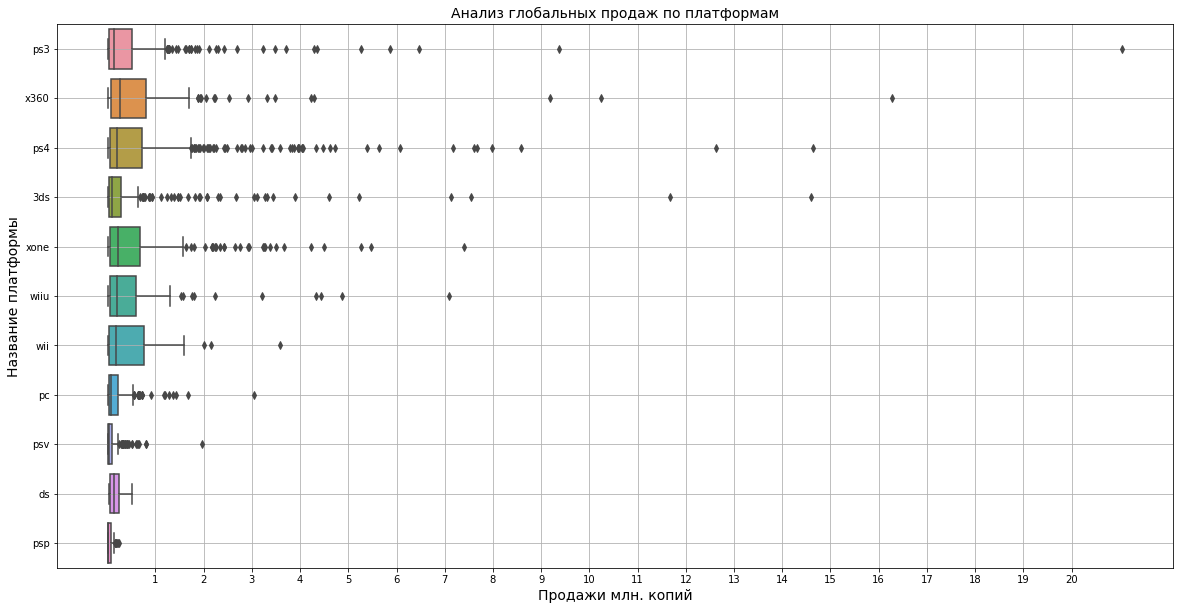

In [20]:
global_total_sales = actual_period_df.loc[:, ['platform','sales_total']].copy()
plt.figure(figsize=(20,10))
sns.boxplot(data=global_total_sales, x='sales_total', y='platform', orient='h')
plt.grid(True)
plt.title('Анализ глобальных продаж по платформам', fontsize=14)
r = list(range(1,21))
plt.xticks(r)
plt.xlabel('Продажи млн. копий',fontsize=14)
plt.ylabel('Название платформы',fontsize=14)
plt.show()

Как мы видим, у каждого графика размаха по платформе присутствуют выбросы в большом количестве. Продажи резко подскакивали в определенные периоды популярности платформы. Явные аномалии присутствуют у PS3, x360, PS4 и 3DS. Это можно объяснить либо определенной ошибкой сбора информации, либо такое явление могло произойти: например, выход нашумевших игр, которые приносят рекордные продажи.

### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

Для анализа была взята платформа **xone**, поскольку у нее в отличие от таких же болших конкурентов меньше пропусков в оценках критиков и пользователей, которым было назначено значение **-1**

In [21]:
xone_data = actual_period_df.loc[:,['platform', 'critic_score', 'user_score', 'sales_total']].copy()
xone_data = xone_data.query('platform == "xone"')
cleaned_xone_data = xone_data.loc[~((xone_data['user_score'] == -1) | (xone_data['critic_score'] == -1))].copy()
#Взял xxone, поскольку из китов у нее меньше пропусков по оценкам.
#Удалил строки со значениями оценок -1
#xone_data['critic_score'].value_counts()
#функция для графиков

def corr_score_sales(d,row,b):
    meta = d[['sales_total',row]].copy()
    plt.figure(figsize=(12, 8))
    sns.scatterplot(data=meta, x=row, y='sales_total', color='green', alpha=0.5, sizes=(20,200))

    plt.title(f'Зависимость объема продаж от {b}', fontsize=14)
    plt.xlabel(b, fontsize=14)
    plt.ylabel('Объем продаж млн. единиц', fontsize=14)

    meta.plot(x=row, y='sales_total', kind='hexbin', gridsize=9, figsize=(14, 8), sharex=False, grid=True)

    plt.title(f'Зависимость объема продаж от {b}', fontsize=14)
    plt.xlabel(b, fontsize=14)
    plt.ylabel('Объем продаж млн. единиц', fontsize=14)
    
    return meta.corr().round(2)

,sales_total,critic_score
sales_total,1.00,0.41
critic_score,0.41,1.00


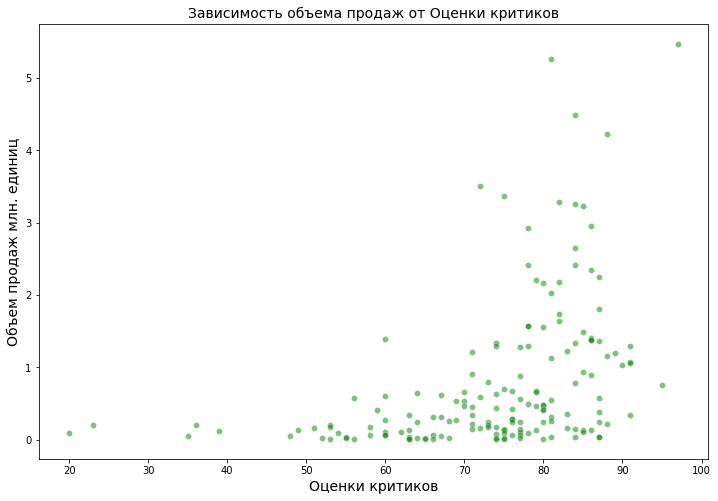

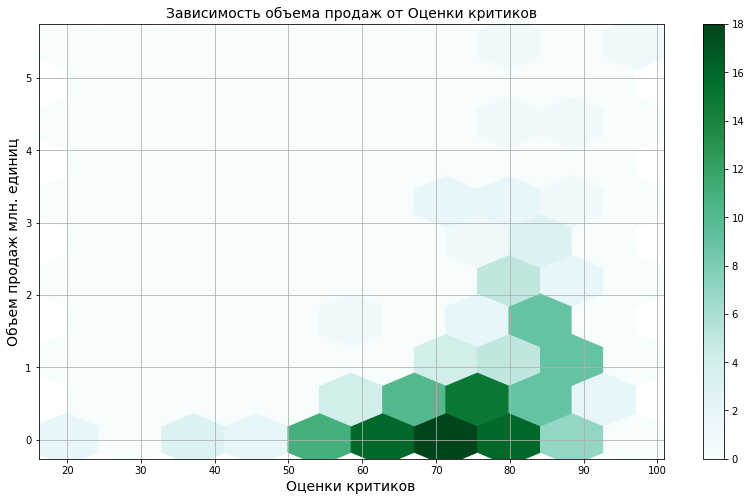

In [22]:
corr_score_sales(cleaned_xone_data,'critic_score', 'Оценки критиков')

**Между Оценкой критиков и Объемом продаж есть однонаправленная зависимость, коэффициент корреляции 0.41. Мы видим на графиках, что довольно слабая зависимость наблюдается в районе рейтинг 60-90, эти оценки оказывают влияние и увеличивают объемы продаж.**

,sales_total,user_score
sales_total,1.00,-0.09
user_score,-0.09,1.00


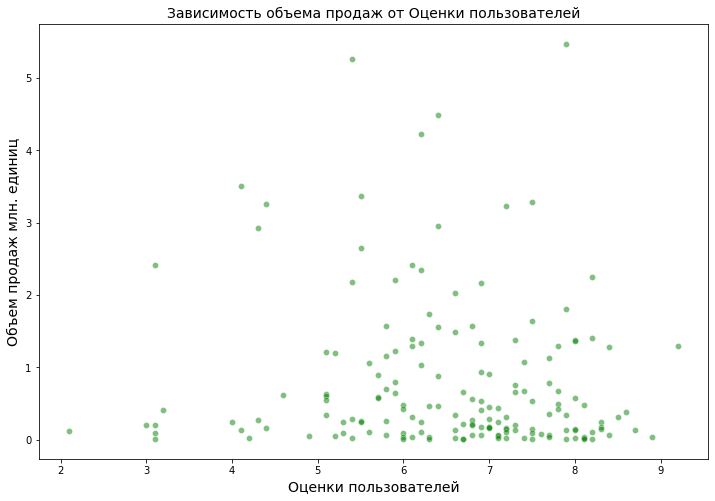

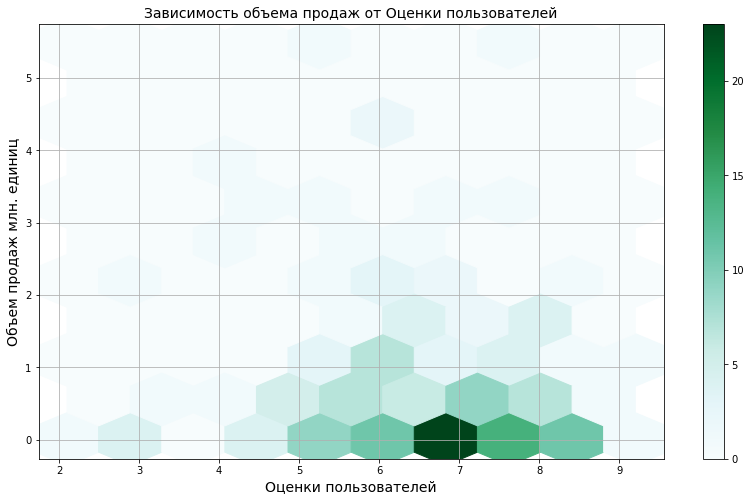

In [23]:
corr_score_sales(cleaned_xone_data, 'user_score', 'Оценки пользователей')

**Зависимость продаж от Отзывов пользователей значительно слабее (фактически ее нет), коэффициент корреляции -0.09**

### Соотнесем выводы с продажами игр на других платформах.

,sales_total,critic_score
sales_total,1.0,0.3
critic_score,0.3,1.0


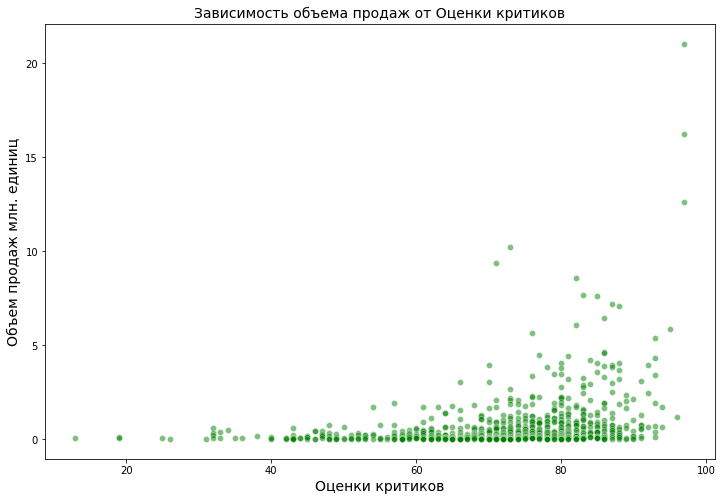

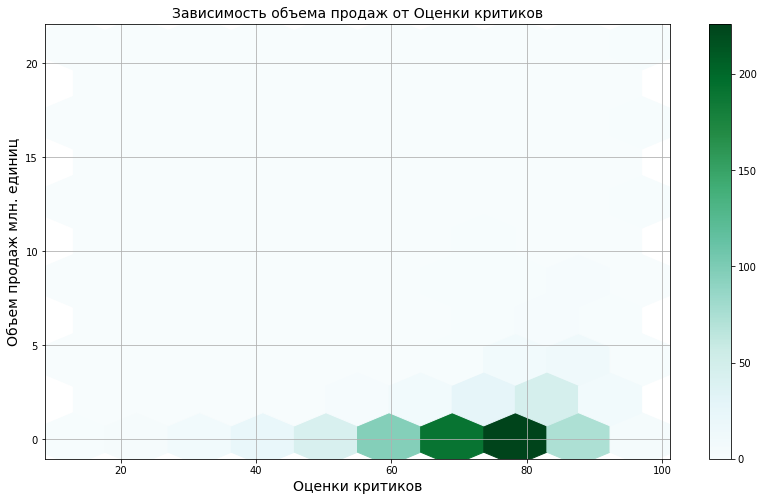

In [24]:
all_platforms_corr_data = actual_period_df.loc[:,['platform', 'critic_score', 'user_score', 'sales_total']].copy()
#Уберу из выборки xone платформу, поскольку ее уже изучили
all_platforms_corr_data = all_platforms_corr_data.query('platform != "xone"')
cleaned_all_platforms_corr_data = all_platforms_corr_data.loc[
    ~((all_platforms_corr_data['critic_score'] == -1) | (all_platforms_corr_data['user_score'] == -1))
]

corr_score_sales(cleaned_all_platforms_corr_data,'critic_score', 'Оценки критиков')

,sales_total,user_score
sales_total,1.00,0.01
user_score,0.01,1.00


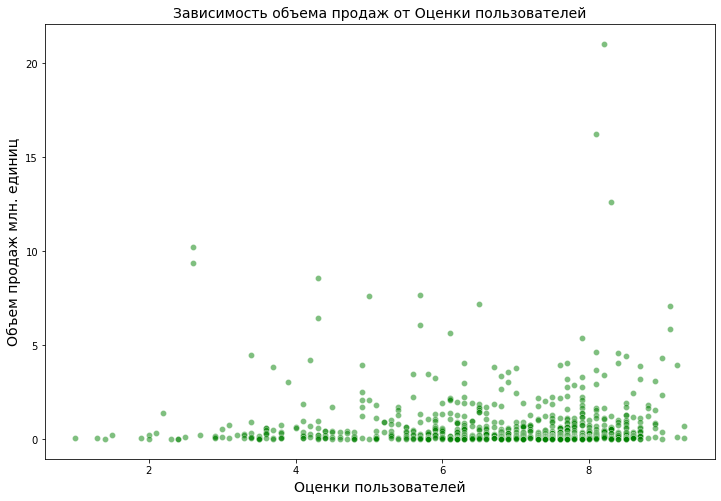

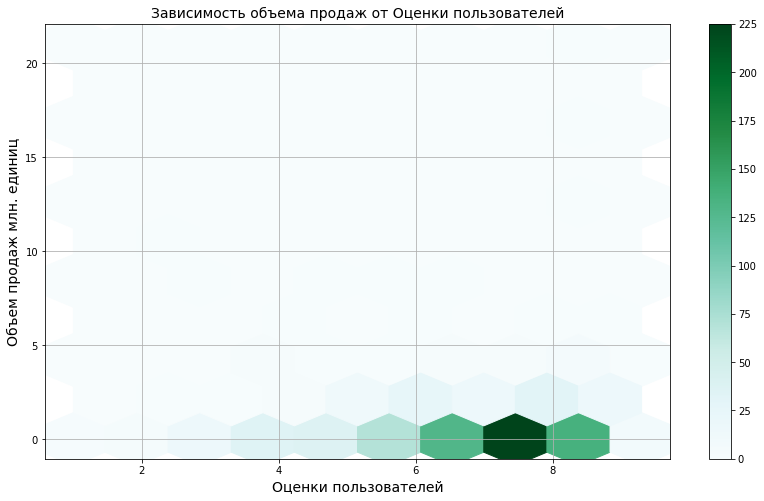

In [25]:
corr_score_sales(cleaned_all_platforms_corr_data, 'user_score', 'Оценки пользователей')

**Как мы видим, у других платформ похожая ситуация.**
- **Касательно Оценки критиков - зависимость есть, но слабая (к.корреляции = 0.3). Чем выше оценка - тем больше объем продаж, но не часто.**
- **Касательно Оценки пользователей - здесь зависимости нет.**

### Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

,genre,sales_total
8,shooter,0.450
10,sports,0.240
4,platform,0.225
7,role-playing,0.125
2,fighting,0.125
6,racing,0.120
0,action,0.110
9,simulation,0.100
3,misc,0.100
11,strategy,0.080


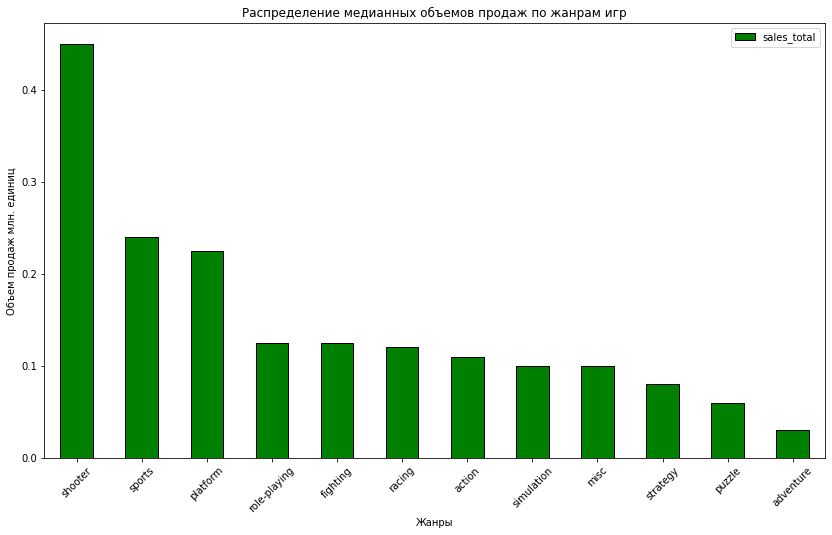

In [26]:
genre_global = actual_period_df.loc[:, ['name', 'genre', 'sales_total']].copy()

grouped_genre_global = genre_global.groupby(['genre'], as_index=False
                                           ).agg({'sales_total':'median'}
                                           ).sort_values(by='sales_total', ascending=False)
display(grouped_genre_global)

grouped_genre_global.plot(kind='bar', x='genre', y='sales_total', color='green', ec='black', figsize=(14,8))
plt.title('Распределение медианных объемов продаж по жанрам игр')
plt.ylabel('Объем продаж млн. единиц')
plt.xlabel('Жанры')
plt.xticks(rotation=45)
plt.legend()
plt.show()

Взял медиану объема продаж по каждой платформе, чтобы определить стабильно прибыльный жанр.
- Распределение данных нормальное. Больше всех показатель продаж у игр в жанре **Shooter** и меньше всех в жанре **Adventure**
- Особенно популярные направления: Shooter, Sports, Platform | Особенно непопулярные: Strategy, Puzzle, Adventure

In [27]:
max_grp = grouped_genre_global.query('genre in ["action", "sports", "shooter"]')
min_grp = grouped_genre_global.query('genre in ["strategy", "adventure", "puzzle"]')
big = max_grp['sales_total'].sum()
small = min_grp['sales_total'].sum()
diff =  (big - small) / small * 100

print(f'Разница между продажами 3х самых популярных и 3х самых непопулярных жанров составила {diff.round(2)}%')

Разница между продажами 3х самых популярных и 3х самых непопулярных жанров составила 370.59%


**Суммарные продажи в жанрах Action, Sports, Shooter больше продаж в Strategy, Adventure, Puzzle на 741%!
Тем не менее, затраты на производство ААА игр совершенно несопоставимы с затратами на паззлы, инди игры и стратегии. Более детальный анализ можно провести, только зная ключевые показатели прибыли и издержек.**

## Составим портрет пользователя каждого региона

### NA регион (North America)

In [28]:
#функция для таблиц и графиков
def pop_region_check(region,color):
    popular = actual_period_df.loc[:,['genre', 'platform', region, 'rating']].copy()
    popular = popular.groupby('platform', as_index=False
                                      ).agg({region:'sum'}).sort_values(by=region,ascending=False)
    display(popular.head(5))
    popular.plot(kind='bar', x='platform', y=region, figsize=(12,6), color=color, ec='black')
    plt.title('Соотношение объема продаж по конкретным платформам в регионе', fontsize=14)
    plt.xlabel('Платформа', fontsize=14)
    plt.ylabel('Объем продаж млн. копиий', fontsize=14)
    plt.xticks(rotation=45)
    
    genre = actual_period_df.loc[:,['genre', 'platform', region, 'rating']].copy()
    genre = genre.groupby('genre', as_index=False
                                      ).agg({region:'sum'}).sort_values(by=region,ascending=False).copy()
    display(genre.head(5))
    genre.plot(kind='bar', x='genre', y=region, figsize=(12,6), color=color, ec='black')
    plt.title('Соотношение объема продаж по игровым жанрам в регионе', fontsize=14)
    plt.xlabel('Жанр', fontsize=14)
    plt.ylabel('Объем продаж млн. копиий', fontsize=14)
    plt.xticks(rotation=45)
    
    
def median_region_check(region,color):
    popular2 = actual_period_df.loc[:,['genre', 'platform', region, 'rating']].copy()
    popular2 = popular2.groupby('platform', as_index=False
                                      ).agg({region:'median'}).sort_values(by=region,ascending=False)
    display(popular2.head(5))
    popular2.plot(kind='bar', x='platform', y=region, figsize=(12,6), color=color, ec='black')
    plt.title('Соотношение медианного объема продаж по конкретным платформам в регионе', fontsize=14)
    plt.xlabel('Платформа', fontsize=14)
    plt.ylabel('Объем продаж млн. копиий', fontsize=14)
    plt.xticks(rotation=45)
    
    genre2 = actual_period_df.loc[:,['genre', 'platform', region, 'rating']].copy()
    genre2 = genre2.groupby('genre', as_index=False
                                      ).agg({region:'median'}).sort_values(by=region,ascending=False).copy()
    display(genre2.head(5))
    genre2.plot(kind='bar', x='genre', y=region, figsize=(12,6), color=color, ec='black')
    plt.title('Соотношение медианного объема продаж по игровым жанрам в регионе', fontsize=14)
    plt.xlabel('Жанр', fontsize=14)
    plt.ylabel('Объем продаж млн. копиий', fontsize=14)
    plt.xticks(rotation=45)

In [29]:
#функция для влияния рейтинга на продажи'
def rating_value(region,color):
    rate = actual_period_df.loc[:,[region, 'rating']].copy()
    rate = rate.loc[~(rate['rating'] == -1)]
    rate = rate.loc[~(rate[region] == 0)]
    rate = rate.groupby('rating', as_index=False).agg({region:'sum'})
    rate.plot(kind='bar', y=region, x='rating', color=color, figsize=(12,6), ec='black')
    plt.xticks(rotation=45)
    plt.title('Соотношение объема продаж по игровым жанрам в регионе', fontsize=14)
    plt.xlabel('Рейтинг ESRB', fontsize=14)
    plt.ylabel('Объем продаж в регионе млн. копиий', fontsize=14)

,platform,na_sales
4,ps4,108.74
10,xone,93.12
9,x360,81.66
3,ps3,63.50
0,3ds,38.20


,genre,na_sales
0,action,126.05
8,shooter,109.74
10,sports,65.27
7,role-playing,46.40
3,misc,27.49


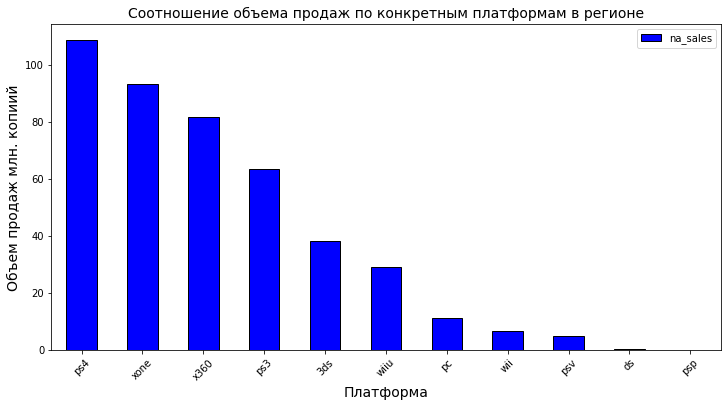

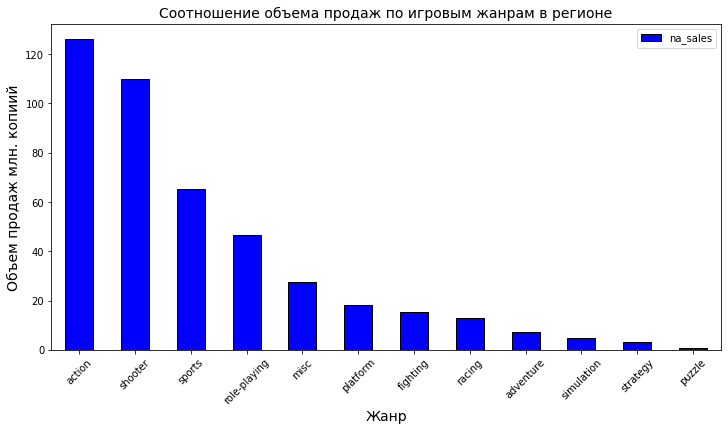

In [30]:
pop_region_check('na_sales','blue')
plt.show()

,platform,na_sales
9,x360,0.15
10,xone,0.12
8,wiiu,0.09
4,ps4,0.06
7,wii,0.04


,genre,na_sales
8,shooter,0.200
4,platform,0.090
10,sports,0.080
2,fighting,0.045
6,racing,0.030


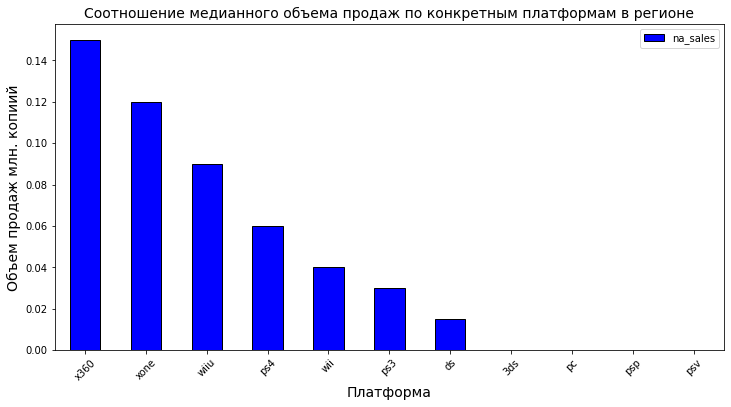

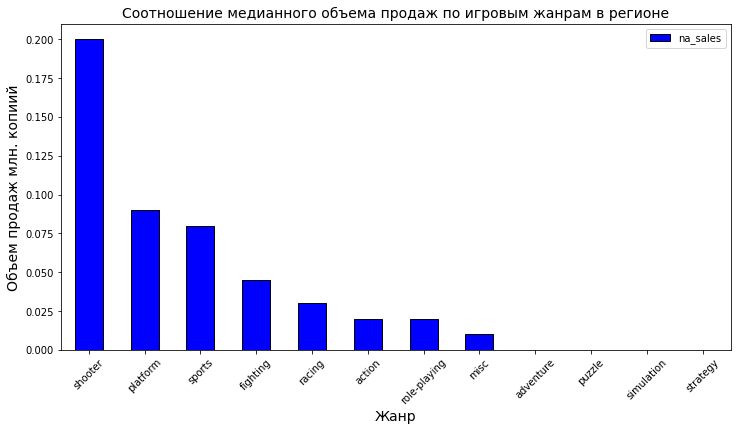

In [31]:
median_region_check('na_sales','blue')
plt.show()

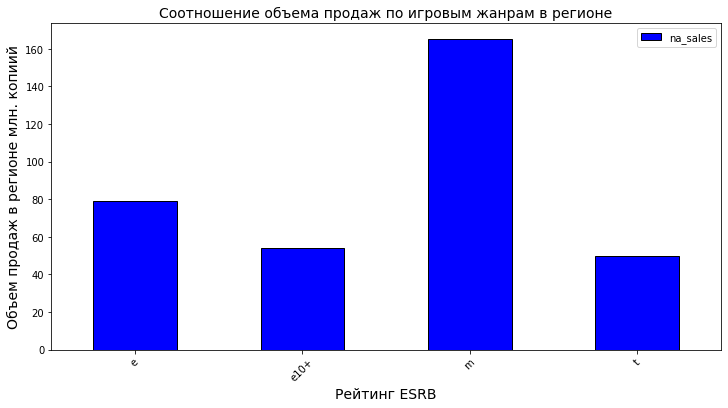

In [32]:
rating_value('na_sales','blue')
plt.show()

**Разница продаж не так уж велика среди платформ, все также видим трех "китов" в лидерах: Nintendo, Xbox, PlayStation.
Рынок олигопилистический, маленьким компаниям достается мало пользователей. Самые стабильные платформы по медиане продаж в порядке убывания: x360 Xone Wiiu PS4. Бестселлеры стреляют/стреляли на платформах: PS4 Xone x360 PS3.**

**Касательно жанров на пике популярности: Action, Sports, Shooter. По медиане продаж самые поплуярные: Shooter Platform Sports. На разработку таких больших проектов уходит очень много ресурсов, в т.ч. рекламные кампании, поскольку нужно делать красиво, реалистично и мощно, чтобы заинтересовать пользователя. Отсюда большие продажи и большие затраты. Жанры Adventure, Puzzle, Strategy специфичные, недорогие в разработке и не требуют особой рекламы.**

**Портрет пользователя NA региона:**
- *Играет в основном в PS4/Xone/x360*
- *Любимые жанры: Action, Sports, Shooter*
- *Возраст: в основном ребята старше 17ти лет (m). Но достаточно большую долю рынка также охватывают и игры для тинейджеров (t) и игры для детей (e)*

,platform,eu_sales
4,ps4,141.09
3,ps3,67.81
10,xone,51.59
9,x360,42.52
0,3ds,30.96


,genre,eu_sales
0,action,118.13
8,shooter,87.86
10,sports,60.52
7,role-playing,36.97
6,racing,20.19


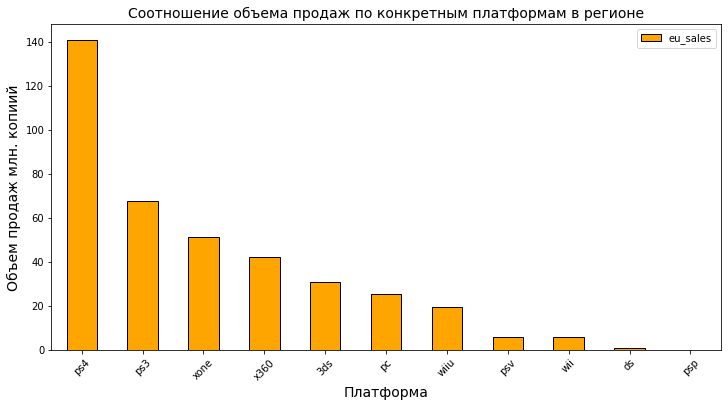

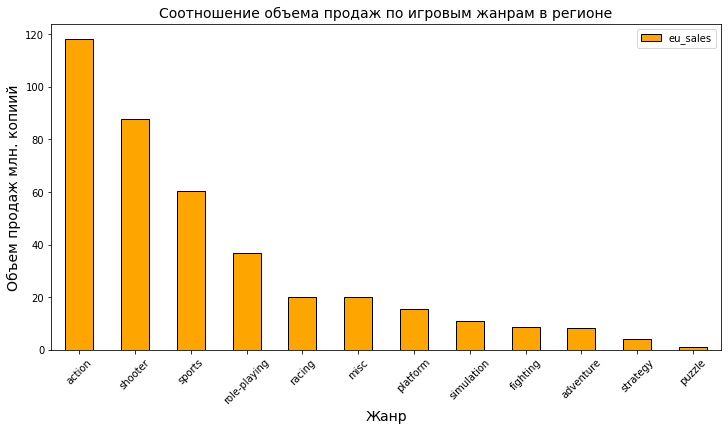

In [33]:
pop_region_check('eu_sales','orange')
plt.show()

,platform,eu_sales
7,wii,0.100
1,ds,0.095
4,ps4,0.080
9,x360,0.080
8,wiiu,0.070


,genre,eu_sales
8,shooter,0.190
4,platform,0.080
6,racing,0.060
10,sports,0.050
9,simulation,0.035


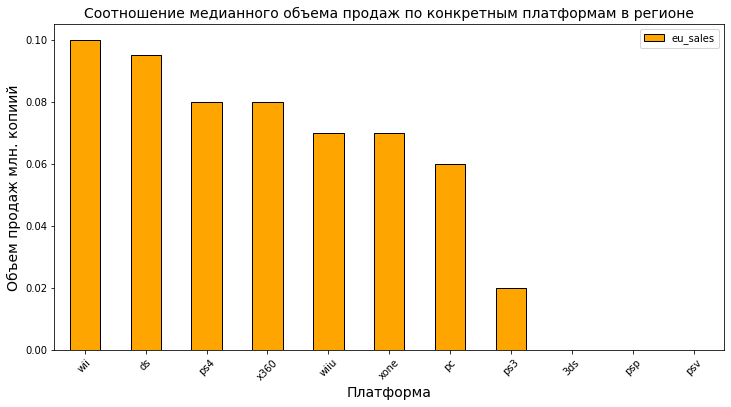

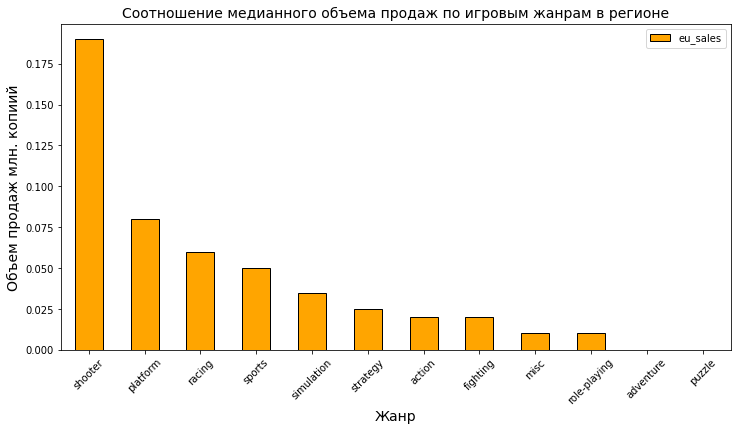

In [34]:
median_region_check('eu_sales','orange')
plt.show()

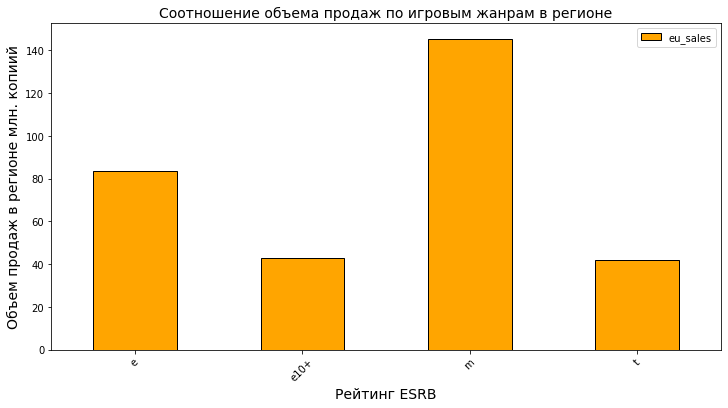

In [35]:
rating_value('eu_sales','orange')
plt.show()

**По производителям платформ здесь ситуация похожа на  Американский рынок. Видим, что в Европе популярнее PlayStation от Sony, чем Xbox. Топы продаж по платформам со звездными проектами: PS4, PS3, Xone. А когда смотрим стабильность увеличения продаж, картина меняется. По платформам в топе стабильности: Wii Ds PS4 x360 Wiiu Xone PC.**

**С жанрами ситуация идентичная, но уровень продаж в Европейском регионе ниже, чем в Американском. Топы продаж по жанрам со звездными проектами:Action Shooter Sports. В топе жанров по медианным продажам: Shooter Platform Racing.**

**Портрет пользователя EU региона:**
- *Играет в основном в PS4/PS3/Xone*
- *Любимые жанры: Action, Sports, Shooter*
- *В Европе в игры играет больше ребят старше 17ти лет (m). В этом регионе детских игр (e) продано больше, чем игр для тинейджеров (t)

,platform,jp_sales
0,3ds,67.81
3,ps3,23.35
6,psv,18.59
4,ps4,15.96
8,wiiu,10.88


,genre,jp_sales
7,role-playing,51.04
0,action,40.49
3,misc,9.20
2,fighting,7.65
8,shooter,6.61


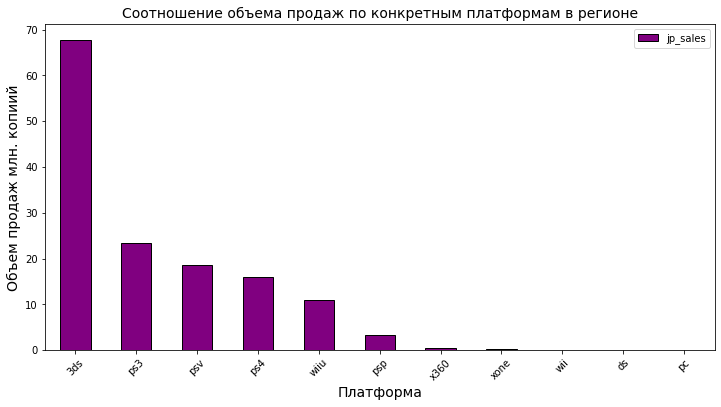

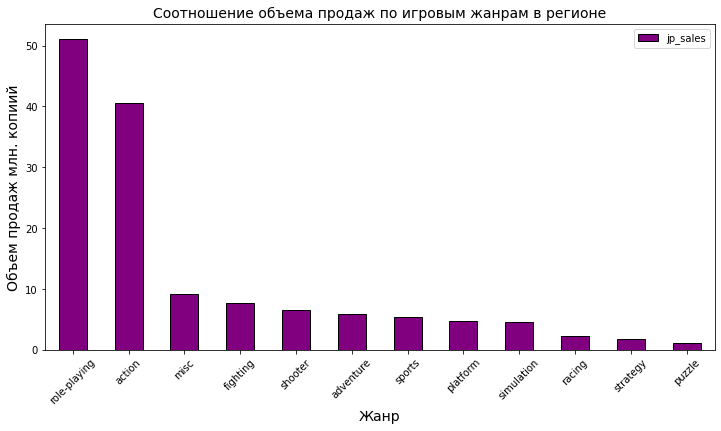

In [36]:
pop_region_check('jp_sales','purple')
plt.show()

,platform,jp_sales
0,3ds,0.06
3,ps3,0.03
6,psv,0.03
5,psp,0.02
4,ps4,0.01


,genre,jp_sales
7,role-playing,0.05
2,fighting,0.03
3,misc,0.02
5,puzzle,0.02
0,action,0.01


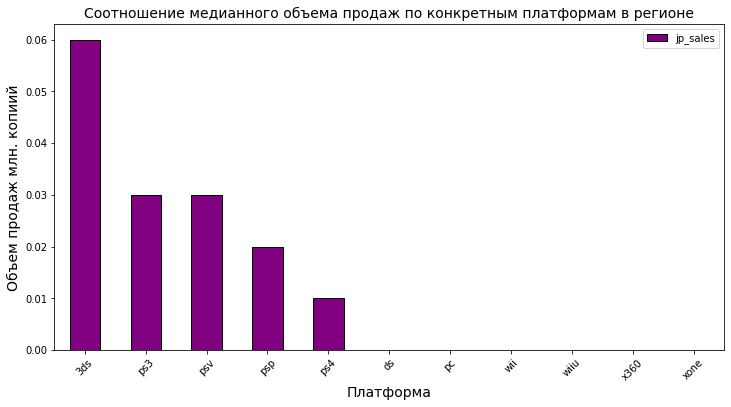

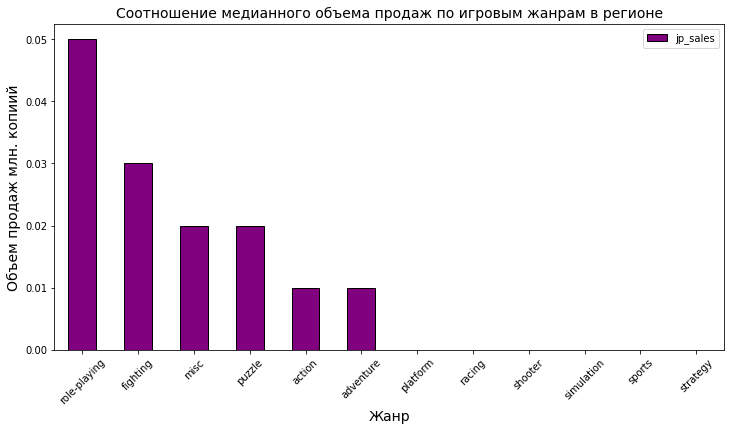

In [37]:
median_region_check('jp_sales','purple')
plt.show()

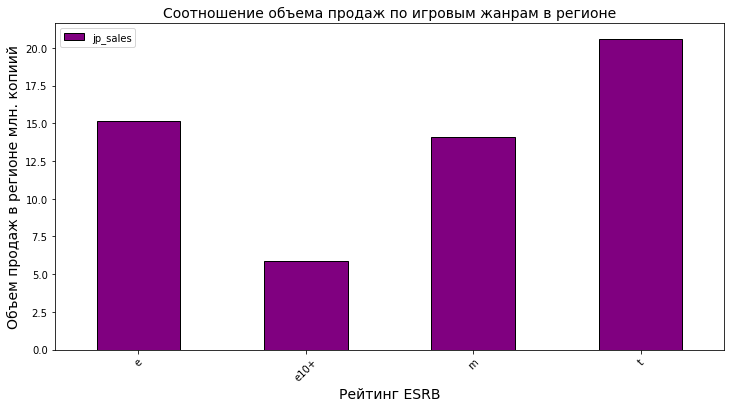

In [38]:
rating_value('jp_sales','purple')
plt.show()

**По производителям платформ здесь ситуация похожая, но выбор в пользу местных производителей, в Xbox почти не играют. Инициативу, правда, мощно перехватила Nintendo с приставкой 3DS. Топ платформ по суммарным продажам: 3ds PS3 PSV PS4. Топ платформ по медианным продажам: 3ds PS3 PSV PSP.**

**С жанрами поменялась, теперь в лидерах Role-playing, жанр Action теперь уступает. По общим объемам продаж Японский рынок меньше, чем Американский и Евпропейский. Здесь меньше времени уделяют играм. Топ жанров по суммарным продажам: Role-playing, Action, Misc. Топ жанров по медианным продажам: Role-playing, Fighting, Misc.**

**Портрет пользователя JP региона:**
- *Играет в основном в 3DS/PS3/PSV/PS4*
- *Любимые жанры: Role-playing, Action, Miscellaneous (пример Sims)*
- *В Японии играми увлекаются в большей степени тинейджеры(t), дети(e) и ребята старши 17(m) занимают почти одинаковую долю*


## Проверяем гипотезы

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформируем гипотезы:
- Нулевая гипотеза (H0): Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Альтернативная гипотеза (H1): Средние пользовательские рейтинги платформ Xbox One и PC различаются.

Выбран метод ttest_ind, поскольку выборки независимые. two_sided проверка, потому что проверяем гипотезу их неравенства.

In [39]:
gip_platforms = actual_period_df.loc[:,['platform','user_score']].copy()
gip_platforms = gip_platforms.query('platform in ["xone","pc"] and user_score != -1')
x1 = gip_platforms.query('platform == "xone"').copy()
x1 = x1['user_score']
x2 = gip_platforms.query('platform == "pc"').copy()
x2 = x2['user_score']

alpha = 0.01

result = st.ttest_ind(x1,x2, equal_var=False)

print (f'T-статистика: {result.statistic}, P-значение = {result.pvalue.round(4)}')
if result.pvalue < alpha:
    print('Нулевую гипотезу следует отвергнуть. Результат: Средние пользовательские рейтинги платформ Xbox One и PC различаются.')
else:
    print('Нулевую гипотезу нельзя отвергнуть. Результат: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.')
    
    

T-статистика: 1.45192815744488, P-значение = 0.1476
Нулевую гипотезу нельзя отвергнуть. Результат: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.


**Согласно нашей проверке получаем, что подтверждается нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.**

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Сформируем гипотезы:
- Нулевая гипотеза (H0): Средние пользовательские рейтинги жанров Action и Sports одинаковые;
- Альтернативная гипотеза (H1): Средние пользовательские рейтинги жанров Action и Sports различаются.

Выбран метод ttest_ind, поскольку выборки независимые. two_sided проверка, потому что проверяем гипотезу их неравенства.

In [40]:
gip_genre = actual_period_df.loc[:,['genre','user_score']].copy()
gip_genre = gip_genre.query('user_score != -1')

alpha = 0.01
y1 = gip_genre.query('genre == "action"').copy()
y1 = y1['user_score']
y2 = gip_genre.query('genre == "sports"').copy()
y2 = y2['user_score']

result_genre = st.ttest_ind(y1,y2, equal_var=False)
print(f'Т-статистика: {result_genre.statistic}, P-значение = {result_genre.pvalue.round(4)}')
if result_genre.pvalue < alpha:
    print('Нулевую гипотезу следует отвергнуть. Результат: Средние пользовательские рейтинги жанров Action и Sports различаются.')
else:    
    print('Нулевую гипотезу нельзя отвергнуть. Результат: Средние пользовательские рейтинги жанров Action и Sports одинаковые.')

Т-статистика: 10.233428417448625, P-значение = 0.0
Нулевую гипотезу следует отвергнуть. Результат: Средние пользовательские рейтинги жанров Action и Sports различаются.


**Таким образом, альтернативная гипотеза H1 получает подтверждение. Можем сказать, что средние пользовательские рейтинги жанров Action и Sports различаются.**

## Общий вывод

**В результате проделанной работы:**
- Загрузил первоначальные данные и обозначил проблемы
- Успешно предобработал данные, где нужно - исправил тип, заполнил пропуски, проверил на дубликаты и избавился от ошибок
- В результате Исследовательского анализа определили: 
до 1994года данные несущественны; платформы существуют в основном примерно по 10 лет; актуальным периодом взял для анализа с 2013 по 2016г.; на 2015-2016 популярнее остальных PS4, Xbox One, 3DS (лучше остальных показывает себя PS4); рекордсмен по объемам продаж "олл-тайм" - PS2; Между Оценкой критиков и Объемом продаж есть слабая однонаправленная зависимость, коэффициент корреляции 0.39, зависимость продаж от Отзывов пользователей нет; Больше всех медиана продаж у игр в жанре Shooter и меньше всех в жанре Adventure.
- Американский рынок самый большой по продажам, здесь, как и в Европе, преобладают жанры: Action, Sports, Shooter. Американсеи пользователи тинейджеры либо ребята старше 17 лет играют преимущественно в PS4 и Xbox, европейцы больше играют в PS4/PS3, Xone не такой популярный. В Японии ситуация другая - здесь играм уделяют меньше внимания. Играют, в основном, тинейджеры, популярные платформы местного производства: Nintendo(лидер) и Sony.
- Проверив выдвинутые гипотезы, я узнал: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые, а средние пользовательские рейтинги жанров Action и Sports различаются.